In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Format decimales pandas
pd.options.display.float_format = '{:,.3f}'.format

In [7]:
df_coronavirus = pd.read_csv('./../db/covid_19_data.csv')
print(df_coronavirus.shape)
print(df_coronavirus.head())

(236017, 8)
   SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0      1.000   0.000      0.000  
1     14.000   0.000      0.000  
2      6.000   0.000      0.000  
3      1.000   0.000      0.000  
4      0.000   0.000      0.000  


In [4]:
# Seteando el tipo tipo a columna
df_coronavirus['ObservationDate'] = pd.to_datetime(df_coronavirus['ObservationDate'])
print(df_coronavirus.dtypes)

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update                object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object


In [8]:
# Eliminando columna
df_coronavirus = df_coronavirus.drop(['SNo'], axis=1)
df_coronavirus.head()


,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.000,0.000,0.000
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.000,0.000,0.000
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.000,0.000,0.000
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.000,0.000,0.000
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.000,0.000,0.000


In [39]:
# Agrupe por una columna, y aplique para los campos numericos operaciones
df_coronavirus_time = df_coronavirus.groupby(['ObservationDate']).sum()
df_coronavirus_time


,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.000,17.000,30.000
2020-01-23,"1,097.000",34.000,60.000
2020-01-24,941.000,26.000,39.000
2020-01-25,"1,437.000",42.000,42.000
2020-01-26,"2,118.000",56.000,56.000
...,...,...,...
2021-02-23,"112,109,754.000","2,485,434.000","63,295,144.000"
2021-02-24,"112,554,301.000","2,497,488.000","63,504,603.000"
2021-02-25,"113,001,412.000","2,507,624.000","63,732,295.000"


In [74]:
# Agrupacion por columnas, y aplicando operaciones a volres numericos
df_coronavirus.groupby(['ObservationDate', 'Country/Region']).sum()

       ObservationDate Province/State Country/Region Last Update  Confirmed  \
0                  NaT            NaN            NaN         NaN        NaN   
1                  NaT            NaN            NaN         NaN        NaN   
2                  NaT            NaN            NaN         NaN        NaN   
3                  NaT            NaN            NaN         NaN        NaN   
4                  NaT            NaN            NaN         NaN        NaN   
...                ...            ...            ...         ...        ...   
236012             NaT            NaN            NaN         NaN        NaN   
236013             NaT            NaN            NaN         NaN        NaN   
236014             NaT            NaN            NaN         NaN        NaN   
236015             NaT            NaN            NaN         NaN        NaN   
236016             NaT            NaN            NaN         NaN        NaN   

        Deaths  Recovered  
0          NaN        N

Confirmed    Deaths   Recovered
ObservationDate Country/Region                                      
2020-01-22      Hong Kong                0.000     0.000       0.000
                Japan                    2.000     0.000       0.000
                Macau                    1.000     0.000       0.000
                Mainland China         547.000    17.000      28.000
                South Korea              1.000     0.000       0.000
...                                        ...       ...         ...
2021-02-27      Vietnam              2,432.000    35.000   1,844.000
                West Bank and Gaza 181,909.000 2,025.000 166,119.000
                Yemen                2,269.000   631.000   1,435.000
                Zambia              78,202.000 1,081.000  73,609.000
                Zimbabwe            36,058.000 1,463.000  32,590.000

[69085 rows x 3 columns]

In [48]:
# Rellenando los valores nulos
df_coronavirus_time = df_coronavirus_time.fillna({'Confirmed': 555.0, 'Deaths': 17.0, 'Recovered': 28.0})
df_coronavirus_time



,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.000,17.000,30.000
2020-01-23,"1,097.000",34.000,60.000
2020-01-24,941.000,26.000,39.000
2020-01-25,"1,437.000",42.000,42.000
2020-01-26,"2,118.000",56.000,56.000
...,...,...,...
2021-02-23,"112,109,754.000","2,485,434.000","63,295,144.000"
2021-02-24,"112,554,301.000","2,497,488.000","63,504,603.000"
2021-02-25,"113,001,412.000","2,507,624.000","63,732,295.000"


In [49]:
# Acumulando los valores en cada iteracion de las filas
# .cumsum()
df_coronavirus_time.cumsum().head(5)


,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.000,17.000,30.000
2020-01-23,"1,654.000",51.000,90.000
2020-01-24,"2,595.000",77.000,129.000
2020-01-25,"4,032.000",119.000,171.000
2020-01-26,"6,150.000",175.000,227.000


In [52]:
# Realizando agrupacion para campos de fecha y aplicando operaciones acumuladas
# resample('7D')
# 7D => 7 dias de rango
# W-Sun => Cada domingo
# M => Mensual
print(df_coronavirus_time.resample('7D').sum())
print(df_coronavirus_time.resample('M').sum())
print(df_coronavirus_time.resample('M').count().tail())

                      Confirmed         Deaths       Recovered
ObservationDate                                               
2020-01-22           14,655.000        388.000         400.000
2020-01-29           96,923.000      2,056.000       2,744.000
2020-02-05          257,684.000      5,755.000      19,129.000
2020-02-12          461,136.000     11,323.000      66,699.000
2020-02-19          546,252.000     16,884.000     152,607.000
2020-02-26          605,825.000     20,638.000     276,701.000
2020-03-04          742,841.000     25,693.000     406,794.000
2020-03-11        1,101,629.000     42,030.000     513,143.000
2020-03-18        2,168,853.000     92,638.000     653,174.000
2020-03-25        4,611,234.000    216,754.000     997,676.000
2020-04-01        8,182,654.000    451,718.000   1,713,600.000
2020-04-08       12,150,499.000    759,027.000   2,807,321.000
2020-04-15       16,190,557.000  1,109,520.000   4,165,355.000
2020-04-22       20,176,209.000  1,417,126.000   5,747,

In [53]:
# 12h => Rango de 12 Horas
# min_count=1 => El minimo valor para sumar sera 1
# Lo que significa que se generaran horas nulas
print(df_coronavirus_time.resample('12h').sum(min_count=1))

                          Confirmed        Deaths      Recovered
ObservationDate                                                 
2020-01-22 00:00:00         557.000        17.000         30.000
2020-01-22 12:00:00             NaN           NaN            NaN
2020-01-23 00:00:00       1,097.000        34.000         60.000
2020-01-23 12:00:00             NaN           NaN            NaN
2020-01-24 00:00:00         941.000        26.000         39.000
...                             ...           ...            ...
2021-02-25 00:00:00 113,001,412.000 2,507,624.000 63,732,295.000
2021-02-25 12:00:00             NaN           NaN            NaN
2021-02-26 00:00:00 113,415,604.000 2,517,422.000 63,992,563.000
2021-02-26 12:00:00             NaN           NaN            NaN
2021-02-27 00:00:00 113,784,735.000 2,525,401.000 64,243,285.000

[805 rows x 3 columns]


In [55]:
# Permite rellenar los valores null o nan por un valor que marque crecimiento lineal
# Entre el valor proximo encontrado y el inicio (Util cuando son valores acumulados)
# .interpolate()
df_coronavirus_cum = df_coronavirus_time.interpolate()
df_coronavirus_cum


,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.000,17.000,30.000
2020-01-23,"1,097.000",34.000,60.000
2020-01-24,941.000,26.000,39.000
2020-01-25,"1,437.000",42.000,42.000
2020-01-26,"2,118.000",56.000,56.000
...,...,...,...
2021-02-23,"112,109,754.000","2,485,434.000","63,295,144.000"
2021-02-24,"112,554,301.000","2,497,488.000","63,504,603.000"
2021-02-25,"113,001,412.000","2,507,624.000","63,732,295.000"


In [57]:
# Agrupandp por una columna, aplicando operaciones en una columna
# Obteniendo los maximos ordenados descendentemente
df_coronavirus.groupby(['Country/Region'])['Confirmed'].max().sort_values(ascending=False)


Country/Region
France                  3,664,050.000
UK                      3,653,272.000
US                      3,563,578.000
Turkey                  2,693,164.000
India                   2,146,777.000
                             ...     
The Bahamas                     1.000
Micronesia                      1.000
North Ireland                   1.000
Republic of the Congo           1.000
 Azerbaijan                     1.000
Name: Confirmed, Length: 227, dtype: float64

In [62]:
# Pivort table
df_coronavirus.pivot_table(values=['Confirmed'], index=['Country/Region'], aggfunc=[np.max, np.min])


,amax,amin
,Confirmed,Confirmed
Country/Region,,
Azerbaijan,1.000,1.000
"('St. Martin',)",2.000,2.000
Afghanistan,"55,707.000",1.000
Albania,"106,215.000",2.000
Algeria,"112,960.000",1.000
...,...,...
West Bank and Gaza,"181,909.000",84.000
Yemen,"2,269.000",1.000


In [63]:
# Tip para obtener como lista los nombres de las columnas del df
print(list(df_coronavirus))


['ObservationDate', 'Province/State', 'Country/Region', 'Last Update', 'Confirmed', 'Deaths', 'Recovered']


In [65]:
# Agrupacion por 2 columnas
# Una de ellas usando la funcion .Grouper que permite realizar una sobreagrupacion sobre el campo seleccionado por frecuencia
# pd.Grouper(key='columna', freq='intervalor de tiempo')
df_coronavirus_time_grouper = df_coronavirus.groupby(['Country/Region',
                                                      pd.Grouper(key='ObservationDate', freq='1D')]).sum()
df_coronavirus_time_grouper

Confirmed  Deaths  Recovered
Country/Region                 ObservationDate                              
 Azerbaijan                    2020-02-28           1.000   0.000      0.000
('St. Martin',)                2020-03-10           2.000   0.000      0.000
Afghanistan                    2020-02-24           1.000   0.000      0.000
                               2020-02-25           1.000   0.000      0.000
                               2020-02-26           1.000   0.000      0.000
...                                                   ...     ...        ...
occupied Palestinian territory 2020-03-12           0.000   0.000      0.000
                               2020-03-14           0.000   0.000      0.000
                               2020-03-15           0.000   0.000      0.000
                               2020-03-16           0.000   0.000      0.000
                               2020-03-17           0.000   0.000      0.000

[69085 rows x 3 columns]

In [79]:
# Seleccionando los valores filtrando por una columna
df_france = df_coronavirus_time_grouper.loc['France', :]
df_france

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-24,2.000,0.000,0.000
2020-01-25,3.000,0.000,0.000
2020-01-26,3.000,0.000,0.000
2020-01-27,3.000,0.000,0.000
2020-01-28,4.000,0.000,0.000
...,...,...,...
2021-02-23,"3,689,534.000","85,195.000","258,863.000"
2021-02-24,"3,721,061.000","85,473.000","260,230.000"
2021-02-25,"3,746,475.000","85,734.000","261,648.000"


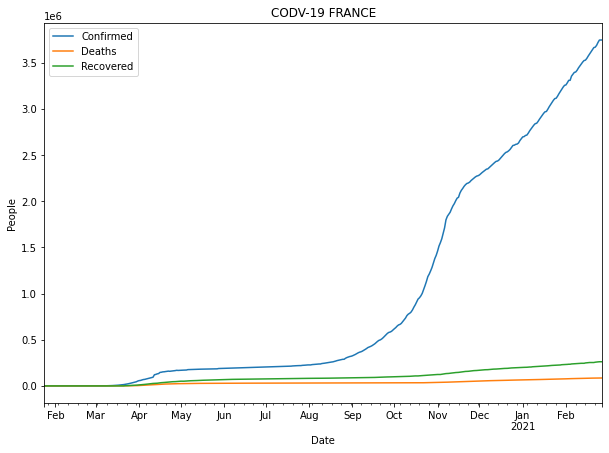

In [67]:
# Grafico
df_france.plot(figsize=(10, 7), title='CODV-19 FRANCE')
plt.xlabel('Date')
plt.ylabel('People')
plt.show()


                    Confirmed     Deaths   Recovered
ObservationDate                                     
2020-01-31              5.000      0.000       0.000
2020-02-29            100.000      2.000      12.000
2020-03-31         52,278.000  3,526.000   9,513.000
2020-04-30        169,098.000 24,380.000  50,380.000
2020-05-31        190,975.000 28,805.000  68,473.000
2020-06-30        204,244.000 29,846.000  76,399.000
2020-07-31        227,239.000 30,268.000  81,764.000
2020-08-31        321,160.000 30,646.000  86,790.000
2020-09-30        605,893.000 31,978.000  98,632.000
2020-10-31      1,414,364.000 36,827.000 123,095.000
2020-11-30      2,276,874.000 52,819.000 167,913.000
2020-12-31      2,677,666.000 64,759.000 200,142.000
2021-01-31      3,255,920.000 76,201.000 230,612.000
2021-02-28      3,747,263.000 85,741.000 261,649.000


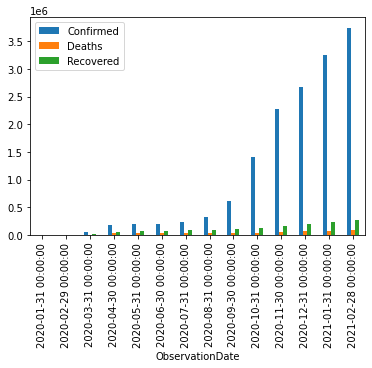

In [71]:
# Obteniendio los maximos, en intervalos de Meses
df_monthly = df_france.resample('M').max()
print(df_monthly)
df_monthly.plot(kind='bar')
plt.show()